In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
import numpy as np
from numpy import argmax
import glob
import re

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve

In [ ]:
df = pd.read_csv('Z:\\Tami - summaries\\FA_pred_1Y.csv')

In [ ]:
df

,Unnamed: 0,main_CustomerKey_Encrypt,X.x,YshuvCd_Encrypt,Antihistamines,Antiinflammatory,systemic.Antibiotics,systemic.Steroids,topicaly.Antibiotics,topicaly.Steroids,...,infnt.systmc.antbtcs.b,infnt.tpcl.antbtcs.b,family.smoke,CLUSTER4,urban,birth_year,X.y,FA_first_Age,FA_by_allergist,FA_before_1Y
0,1,00005A8A244422699216118399B17402D02007A32DA58D...,1,ED30983E2A6C2BF202016B9C4E5166894BC03409B13E79...,0,0,0,0,0,0,...,0,0,0,4.0,0.0,2007,NaN,NaN,NaN,NaN
1,2,0000B0D61D3865CFAC21B96BB15844ADC9456D6D1011AD...,2,E055ED080DAEC181EC77F2C8F4D16AE6225C35898C1079...,0,0,0,0,0,0,...,0,0,0,9.0,1.0,2009,NaN,NaN,NaN,NaN
2,3,0002BB7D9A3D20E8F02C2A3FAB660532C469EE58846CA1...,3,41EE6418CA14CBDAFF714304091E13362AD5EC83421183...,0,0,0,0,0,0,...,0,0,0,4.0,0.0,2010,NaN,NaN,NaN,NaN
3,4,00031E6E8D1405615AEFBD165D913F107DF2FF41B3CD3F...,4,81E394A229C87332BCAEAFA208544F3D229E34F7A161EF...,0,0,1,0,0,0,...,0,0,0,9.0,1.0,2015,NaN,NaN,NaN,NaN
4,5,000410F2A456F973AEE2E66550A679A486AAF05B41FDE9...,5,81E394A229C87332BCAEAFA208544F3D229E34F7A161EF...,0,0,2,0,0,0,...,0,0,0,9.0,1.0,2018,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99758,99759,FFF980C1C2189ED6F66675B4CE0813AE69AF3DC58ACDA2...,99759,3F5E35C2FCD7BD1389902D569D8F9E7A6788FFBD83A275...,0,0,0,0,0,0,...,0,0,0,3.0,0.0,2017,NaN,NaN,NaN,NaN
99759,99760,FFFADD974A73F65999462F8079C27CA06138E02EA2A3E0...,99760,53297BD8A8D903117862BB9457071A5B4B46594910F03F...,0,0,0,0,0,0,...,0,0,0,6.0,0.0,2018,NaN,NaN,NaN,NaN
99760,99761,FFFF0C732FDA3E82B7F8CA0F212FE917D771636A3715FE...,99761,5C795BD8238DD85059B1F49F232BF8E208E8ACFD7E952E...,0,0,0,0,0,0,...,0,0,0,8.0,1.0,2016,NaN,NaN,NaN,NaN
99761,99762,FFFF2DD29A67563A8F81C8AEF7FEBAA4B7ED3FBF9A3A5F...,99762,03E2BB825E76596775B0659E353FF09B5E6C3CA69E127A...,0,0,0,0,0,0,...,0,0,1,6.0,0.0,2005,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

Unnamed: 0                        0
main_CustomerKey_Encrypt          0
X.x                               0
YshuvCd_Encrypt                   0
Antihistamines                    0
Antiinflammatory                  0
systemic.Antibiotics              0
systemic.Steroids                 0
topicaly.Antibiotics              0
topicaly.Steroids                 0
AD                                0
Allergic_Rhinitis                 0
Asthma                            0
FA                                0
w_mother                          0
atopic_meds                       0
atopic_diag                       0
atopic_event                      0
cohort                            0
atopic_event_b                    0
Gender                            0
birth_season                      0
atopic_parent                     0
cnt_sblng                         0
othr_atpc_y_sblng                 0
FA_y_sblng                        0
prcnt_atpc_sblng                  0
infant_AD.y                 

In [ ]:
print(df[df['urban'].isna()][['mtr_age_at_brth','family.smoke','FA_before_1Y','cnt_sblng']].mean())
print(df[df['urban']==1][['mtr_age_at_brth','family.smoke','FA_before_1Y','cnt_sblng']].mean())
print(df[df['urban']==0][['mtr_age_at_brth','family.smoke','FA_before_1Y','cnt_sblng']].mean())

mtr_age_at_brth    28.841878
family.smoke        0.068867
FA_before_1Y        1.000000
cnt_sblng           1.962697
dtype: float64
mtr_age_at_brth    29.136588
family.smoke        0.165299
FA_before_1Y        1.000000
cnt_sblng           1.726974
dtype: float64
mtr_age_at_brth    28.808091
family.smoke        0.160310
FA_before_1Y        1.000000
cnt_sblng           1.631021
dtype: float64


In [ ]:
#df = df.drop(['FA_first_Age','FA_by_allergist'], axis=1)
#df['FA_before_1Y'] = df.FA_before_1Y.fillna(0)

In [ ]:
df.shape

(99763, 56)

In [ ]:
list(df.columns)[1:]

['main_CustomerKey_Encrypt',
 'X.x',
 'YshuvCd_Encrypt',
 'Antihistamines',
 'Antiinflammatory',
 'systemic.Antibiotics',
 'systemic.Steroids',
 'topicaly.Antibiotics',
 'topicaly.Steroids',
 'AD',
 'Allergic_Rhinitis',
 'Asthma',
 'FA',
 'w_mother',
 'atopic_meds',
 'atopic_diag',
 'atopic_event',
 'cohort',
 'atopic_event_b',
 'Gender',
 'birth_season',
 'atopic_parent',
 'cnt_sblng',
 'othr_atpc_y_sblng',
 'FA_y_sblng',
 'prcnt_atpc_sblng',
 'infant_AD.y',
 'systemic.Antibiotics_G',
 'atopic_meds_g',
 'atopic_diag_g',
 'maternal_AD',
 'maternal_Allergic_Rhinitis',
 'maternal_Asthma',
 'maternal_FA',
 'atopic_mother',
 'mtr_age_at_brth',
 'Antihistamines_b',
 'Antiinflammatory_b',
 'systemic.Steroids_b',
 'topicaly.Steroids_b',
 'topicaly.Antibiotics_b',
 'first_born',
 'infant_AD_4m',
 'infnt.systmc.antbtcs',
 'infnt.tpcl.antbtcs',
 'infnt.systmc.antbtcs.b',
 'infnt.tpcl.antbtcs.b',
 'family.smoke',
 'CLUSTER4',
 'urban',
 'birth_year',
 'X.y',
 'FA_first_Age',
 'FA_by_allergist',
 

In [ ]:
df.FA_before_1Y = df.FA_before_1Y.fillna(0)

In [ ]:
print (df.FA_before_1Y.value_counts())
#print(df.cohort.value_counts())
#print (df.FA_6YO.value_counts())

0.0    97017
1.0     2746
Name: FA_before_1Y, dtype: int64


In [ ]:
#df = df.loc[(df['FA_before_1Y']==1) | (df['cohort']==0)]

#print (df.cohort.value_counts())

0    95686
1     2746
Name: cohort, dtype: int64


In [ ]:
Season_dum = pd.get_dummies(df['birth_season'])
df = pd.concat([df, Season_dum], axis=1, join='inner')

In [ ]:
df = df.rename(columns={#"systemic.Steroids":"Systemic Steroids During Pregnancy",
                        #  "topicaly.Antibiotics":"Topical Antibiotics During Pregnancy",
                        #  "othr_atpc_y_sblng":"Sibling Atopic Condition",
                        "FA_before_1Y": "Cohort", #FA_6YO
                          "Summer":"Season of birth: Summer",
                          "Winter":"Season of birth: Winter",
                          "Autumn":"Season of birth: Autumn",
                          "FA_y_sblng":"Sibling Food Allergies", #  FA.Sib
                          "atopic_parent":"Parent Atopic Condition",
                          "FA_parent":"Parent Food Allergy",
                          "infant_AD_4m":"Infant Atopic Dermatitis", #  infant_AD
                          "prcnt_atpc_sblng":"Percent of Siblings with Atopic", #  Percent.atopic.sblng
                       'infnt.systmc.antbtcs':"Infant Systemic Antibiotics", #   "sys_antbtc_1Y"
                       'infnt.tpcl.antbtcs':"Infant Topical Antibiotics", #    top_antbtc_1Y
                       "first_born":"First Born", #  First.Born
                        "family.smoke":"Smoking",
                        "urban":"Urban",
                        "systemic.Antibiotics_G":"Antibiotics During Pregnancy"
                       })

In [ ]:
# New Features

#df['Siblings Food Allergies'] = np.where(df['Sibling Food Allergies']>0,1,0)

#df['Atopic sibling'] = np.where(df['Sibling Atopic Condition'] + df['Sibling Food Allergies']>0,1,0)

#df['First born'] = np.where(df['cnt_sblng']==0,1,0)
#df['First born'].value_counts()

# 'Atopic diagnosis during Pregnancy' to binary
#df['Atopic diagnosis during Pregnancy'] = np.where(df['Atopic diagnosis during Pregnancy']==0,0,1)

In [ ]:
df['birth_year'].value_counts()

2012    6270
2013    6197
2010    6163
2014    6151
2011    6030
2009    6013
2008    5952
2015    5897
2007    5859
2005    5827
2016    5812
2006    5790
2018    5758
2017    5579
2019    5461
2020    5127
2021    2591
2004    2129
2003     374
2002     345
2001     226
2000     200
2022      12
Name: birth_year, dtype: int64

In [ ]:
df = df[(df['birth_year']>=2005) & (df['birth_year']<=2020)]

print(df.Cohort.value_counts(normalize=True))
print(df.Cohort.value_counts(normalize=False))
print(df.cohort.value_counts(normalize=True))


0.0    0.973436
1.0    0.026564
Name: Cohort, dtype: float64
0.0    91392
1.0     2494
Name: Cohort, dtype: int64
0    0.960069
1    0.039931
Name: cohort, dtype: float64


In [ ]:
#Validatoin
df_validation = df[df['birth_year']==2010]
print(df_validation.cohort.value_counts(normalize=True))

df = df[df['birth_year']!=2010]
print(df.cohort.value_counts(normalize=True))

0    0.969011
1    0.030989
Name: cohort, dtype: float64
0    0.960298
1    0.039702
Name: cohort, dtype: float64


In [ ]:
df.Urban = df.Urban.fillna(1)

In [ ]:
### Full FA Model ###
y = df.Cohort

X = df[['Gender',
 'Urban',
 'Smoking',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
 'Infant Systemic Antibiotics', # variable post birth
 'Infant Topical Antibiotics',  # variable post birth
 'Antibiotics During Pregnancy',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter' ]]

X = X.apply(pd.to_numeric)

In [ ]:
df[['Cohort','Gender',
 'Urban',
 'Smoking',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
  'Antibiotics During Pregnancy',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter' ]].isna().sum()

Cohort                             0
Gender                             0
Urban                              0
Smoking                            0
Parent Atopic Condition            0
First Born                         0
Sibling Food Allergies             0
Percent of Siblings with Atopic    0
Infant Atopic Dermatitis           0
Antibiotics During Pregnancy       0
Season of birth: Autumn            0
Season of birth: Summer            0
Season of birth: Winter            0
dtype: int64

In [ ]:
#df.Urban = df.Urban.fillna(1)
df = df.dropna(subset=['Urban'])
df.Cohort.value_counts()

0.0    90741
1.0     2486
Name: Cohort, dtype: int64

In [ ]:
### Full CARE Model : 1Y, No infant antbtcs ###
y = df.Cohort

X = df[['Gender',
 'Urban',
 'Smoking',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
  'Infant Systemic Antibiotics', # variable post birth
# 'Infant Topical Antibiotics',  # variable post birth
# 'Antibiotics During Pregnancy',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter' ]]

X = X.apply(pd.to_numeric)

In [ ]:
#balancing

from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=1) # 70% training and 30% test


pos = df[(df['Cohort']==1)]
pos = pos.sample(n=int(len(pos)*0.7), random_state=35 )
neg = df[(df['Cohort']==0)]
neg = neg.sample(n=int(len(pos)*8), random_state=35 )

X_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
y_train = X_train['Cohort']
X_train = X_train[X.columns]

print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(y_test.value_counts(normalize=False))
print(df.Cohort.value_counts(normalize=True))
print(df.Cohort.value_counts(normalize=False))

0.0    13960
1.0     1745
Name: Cohort, dtype: int64
0.0    0.888889
1.0    0.111111
Name: Cohort, dtype: float64
0.0    0.973088
1.0    0.026912
Name: Cohort, dtype: float64
0.0    27408
1.0      758
Name: Cohort, dtype: int64
0.0    0.973436
1.0    0.026564
Name: Cohort, dtype: float64
0.0    91392
1.0     2494
Name: Cohort, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,auc, classification_report


rf = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=15, random_state=35)

rf.fit(X_train,y_train)

TH = 0.25
y_pred = (rf.predict(X_test) > TH).astype('float')


#model result
rf_matrix = confusion_matrix(y_test, y_pred)
print(rf_matrix)
#print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, rf.predict(X_test)))

[[25646  1762]
 [  428   330]]
Accuracy: 0.9222466803948023
Precision: 0.1577437858508604
Recall: 0.43535620052770446
roc_auc_score: 0.7829624692133876


In [ ]:
y_pred = rf.predict(X_test)
auc_cal = pd.DataFrame(np.column_stack([y_pred,y_test]),
                      columns=['1yc_y_pred','1yc_y_test'])
auc_cal

# auc_cal.to_csv('Z:\\Tami - summaries\\auc_calculation.csv')

,1yc_y_pred,1yc_y_test
0,0.017576,0.0
1,0.019615,0.0
2,0.045267,0.0
3,0.087589,0.0
4,0.036324,0.0
...,...,...
28161,0.044835,0.0
28162,0.000000,0.0
28163,0.037044,0.0
28164,0.007843,0.0


In [ ]:
y_pred = rf.predict(X_test)

auc_1full = pd.DataFrame(np.column_stack([y_pred,y_test]),
                      columns=['1yc_y_pred','1yc_y_test'])
auc_1full

auc_1full.to_csv('Z:\\Tami - summaries\\auc_1Y.csv')

In [ ]:
roc_auc_score(auc_cal['1yc_y_test'], auc_cal['1yc_y_pred'])

0.7809525219218343

In [ ]:
from sklearn.metrics import roc_auc_score
from math import sqrt

In [ ]:
def roc_auc_ci (y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true,y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2-AUC)
    Q2 = 2*AUC**2 / (1+AUC)
    SE_AUC = sqrt((AUC*(1-AUC) + (N1-1)*(Q1-AUC**2)+(N2-1)*(Q2-AUC**2))/(N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower <0:
        lower=0
    if upper >1:
        upper=1
    return (round(lower,2),round(upper,2))

In [ ]:
roc_auc_ci (y_test, rf.predict(X_test), positive=1)

(0.76, 0.8)

In [ ]:
from scipy.stats import sem

ytest = y_test
ytest_len = len(ytest)
indices = range(ytest_len)
ytest.index = indices

X_test = X_test

model = rf

y_pred = model.predict(X_test)

n_bootstraps = 1000
rng_seed = 42
bootstraped_scores = []

print ("Original AUC: {:0.3f}".format(roc_auc_score(ytest,y_pred)))

rng = np.random.RandomState(rng_seed)
for i in range (n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    score = roc_auc_score(ytest[indices], y_pred[indices])
    bootstraped_scores.append(score)
    print("Bootstrap #{} AUC: {:0.3f}".format(i+1,score))

Original AUC: 0.781
Bootstrap #1 AUC: 0.784
Bootstrap #2 AUC: 0.787
Bootstrap #3 AUC: 0.770
Bootstrap #4 AUC: 0.780
Bootstrap #5 AUC: 0.780
Bootstrap #6 AUC: 0.779
Bootstrap #7 AUC: 0.775
Bootstrap #8 AUC: 0.774
Bootstrap #9 AUC: 0.766
Bootstrap #10 AUC: 0.791
Bootstrap #11 AUC: 0.779
Bootstrap #12 AUC: 0.798
Bootstrap #13 AUC: 0.793
Bootstrap #14 AUC: 0.782
Bootstrap #15 AUC: 0.786
Bootstrap #16 AUC: 0.787
Bootstrap #17 AUC: 0.780
Bootstrap #18 AUC: 0.795
Bootstrap #19 AUC: 0.774
Bootstrap #20 AUC: 0.765
Bootstrap #21 AUC: 0.787
Bootstrap #22 AUC: 0.781
Bootstrap #23 AUC: 0.796
Bootstrap #24 AUC: 0.782
Bootstrap #25 AUC: 0.784
Bootstrap #26 AUC: 0.781
Bootstrap #27 AUC: 0.770
Bootstrap #28 AUC: 0.782
Bootstrap #29 AUC: 0.783
Bootstrap #30 AUC: 0.790
Bootstrap #31 AUC: 0.779
Bootstrap #32 AUC: 0.779
Bootstrap #33 AUC: 0.766
Bootstrap #34 AUC: 0.786
Bootstrap #35 AUC: 0.787
Bootstrap #36 AUC: 0.784
Bootstrap #37 AUC: 0.784
Bootstrap #38 AUC: 0.770
Bootstrap #39 AUC: 0.782
Bootstrap #40 

In [ ]:
sorted_scores = np.array(bootstraped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]

print(confidence_lower, confidence_upper)

0.7663724678796593 0.7960960491797647


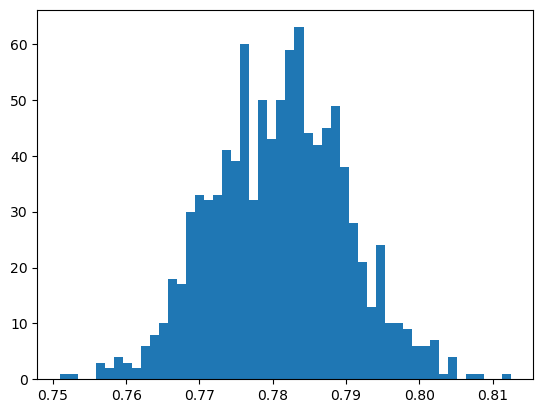

In [ ]:
plt.hist(bootstraped_scores, bins=50)
plt.show()

In [ ]:
#auc_1y_full = bootstraped_scores
#auc_1y_noprg = bootstraped_scores

In [ ]:
auc_1y_noprg

[0.7841166252444968,
 0.7868291317258442,
 0.7703104897788964,
 0.7796543808001126,
 0.78027555677929,
 0.7791950756907373,
 0.7746845094645316,
 0.7739708728540234,
 0.7663820377007463,
 0.7910656729940885,
 0.7791214534392683,
 0.7978762144121502,
 0.7930022979656541,
 0.7823888120289706,
 0.7863597126478308,
 0.7869685902433966,
 0.7804650226267653,
 0.7949981721559096,
 0.7742575819631714,
 0.7653964381949607,
 0.787397069626383,
 0.7806530145491887,
 0.7964675951957377,
 0.7817430772513945,
 0.7843719869236343,
 0.7814363094228872,
 0.7697279533065763,
 0.7822331337050219,
 0.783400163079911,
 0.7895076281871055,
 0.7787696718567189,
 0.7790698639420038,
 0.7655107150128111,
 0.7857797948988742,
 0.7872642905652474,
 0.7844860509411368,
 0.7837740492170021,
 0.7701051282019626,
 0.7821128957656631,
 0.7923571471871376,
 0.7636473103465176,
 0.7847258184085759,
 0.7764832253648979,
 0.783616578677089,
 0.7727592344653316,
 0.7839337704662973,
 0.7830665928377907,
 0.780384356132078

In [ ]:
auc_df = pd.read_csv('Z:\\Tami - summaries\\auc_bootstrap.csv')
auc_df

,Unnamed: 0,FULL,No SES,No prg,Parental Atopic,Infant AD
0,0,0.883021,0.857052,0.798879,0.582837,0.543335
1,1,0.889139,0.871244,0.806550,0.581551,0.539664
2,2,0.880016,0.866958,0.805268,0.587479,0.543761
3,3,0.875337,0.847827,0.790466,0.586005,0.543870
4,4,0.873368,0.852948,0.800525,0.589405,0.547249
...,...,...,...,...,...,...
995,995,0.883655,0.867347,0.803682,0.576331,0.548805
996,996,0.873648,0.859129,0.791837,0.572546,0.535133
997,997,0.880079,0.874867,0.812770,0.576686,0.546758
998,998,0.879675,0.863927,0.802757,0.588157,0.541389


In [ ]:
auc_df.loc[:,'1Y FULL'] = auc_1y_full
auc_df.loc[:,'1Y NoPrg'] = auc_1y_noprg
auc_df

,Unnamed: 0,FULL,No SES,No prg,Parental Atopic,Infant AD,1Y FULL,1Y NoPrg
0,0,0.883021,0.857052,0.798879,0.582837,0.543335,0.820972,0.784117
1,1,0.889139,0.871244,0.806550,0.581551,0.539664,0.837441,0.786829
2,2,0.880016,0.866958,0.805268,0.587479,0.543761,0.812804,0.770310
3,3,0.875337,0.847827,0.790466,0.586005,0.543870,0.823017,0.779654
4,4,0.873368,0.852948,0.800525,0.589405,0.547249,0.833978,0.780276
...,...,...,...,...,...,...,...,...
995,995,0.883655,0.867347,0.803682,0.576331,0.548805,0.832007,0.772085
996,996,0.873648,0.859129,0.791837,0.572546,0.535133,0.831352,0.780943
997,997,0.880079,0.874867,0.812770,0.576686,0.546758,0.831956,0.786666
998,998,0.879675,0.863927,0.802757,0.588157,0.541389,0.835315,0.767302


In [ ]:
auc_df.to_csv('Z:\\Tami - summaries\\auc_bootstrap.csv')

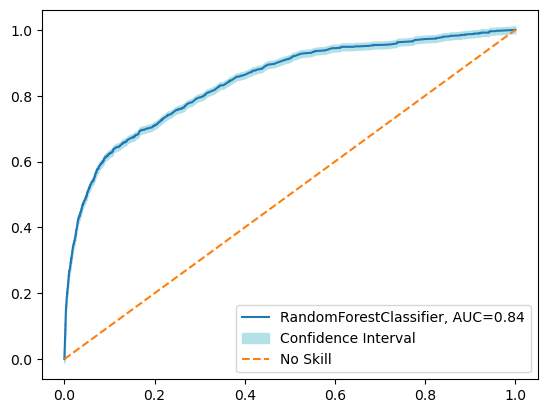

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  rf.predict(X_test))
auc = metrics.roc_auc_score(y_test, rf.predict(X_test))
#plt.plot(fpr,tpr,label="RandomForestClassifier, AUC="+str(auc))
#plt.legend(loc=4)
#plt.show()

# AUC with CI
x = fpr
y = tpr
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot (x,y)
ax.fill_between(x, (y-ci), (y+ci), color='powderblue', alpha=.95)
ax.plot([0,1], [0,1], linestyle='--')
ax.legend(["RandomForestClassifier, AUC="+str(round(auc,2)),"Confidence Interval","No Skill"])

In [ ]:
import pickle
#pickle.dump(rf, open(r'Z:\Tami - summaries\FA_1YO.sav','wb')) # AUC=80, Presicion=15, Recall=58, accuracy=87 (TH=0.25)
#pickle.dump(rf, open(r'Z:\Tami - summaries\FA_1YO_no_a.sav','wb')) # AUC=77, Presicion=9, Recall=58, accuracy=79 (TH=0.12)
#pickle.dump(rf, open(r'Z:\Tami - summaries\FA_6YO_no_ses.sav','wb')) # AUC=80, Presicion=12, Recall=64, accuracy=81 (TH=0.15)
#pickle.dump(rf, open(r'Z:\Tami - summaries\FA_6YO_no_fmly.sav','wb')) # AUC=79, Presicion=13, Recall=59, accuracy=82 (TH=0.15)
#pickle.dump(rf, open(r'Z:\Tami - summaries\FA_AUC87.sav','wb'))
pickle.dump(rf, open(r'Z:\Tami - summaries\FA_1Y_no_infntanti.sav','wb')) # AUC=80

In [ ]:
# Validation on 2010

y_val = df_validation.cohort

X_val = df_validation[['Gender',
 'Urban',
# 'Low SES',
# 'Medium SES',
# 'High SES',
# 'Smoking',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
 'Infant Systemic Antibiotics', # variable post birth
# 'Infant Topical Antibiotics',  # variable post birth
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter' ]]

X_val = X_val.apply(pd.to_numeric)

y_val_pred = (rf.predict(X_val) > TH).astype('float')

rf_matrix = confusion_matrix(y_val, y_val_pred)
print(rf_matrix)
print(classification_report(y_val, y_val_pred))
print("Accuracy:",metrics.accuracy_score(y_val, y_val_pred))
print("Precision:",metrics.precision_score(y_val, y_val_pred))
print("Recall:",metrics.recall_score(y_val, y_val_pred))
print("roc_auc_score:",roc_auc_score(y_val, rf.predict(X_val)))

[[4871 1164]
 [  64  129]]
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      6035
           1       0.10      0.67      0.17       193

    accuracy                           0.80      6228
   macro avg       0.54      0.74      0.53      6228
weighted avg       0.96      0.80      0.87      6228

Accuracy: 0.8028259473346179
Precision: 0.09976798143851508
Recall: 0.6683937823834197
roc_auc_score: 0.8118329605796927


In [ ]:
report

{'0.0': {'precision': 0.9894397620228061,
  'recall': 0.7281982047726775,
  'f1-score': 0.8389524129813352,
  'support': 27406},
 '1.0': {'precision': 0.06840920460230115,
  'recall': 0.7197368421052631,
  'f1-score': 0.12494289629968022,
  'support': 760},
 'accuracy': 0.7279698927785273,
 'macro avg': {'precision': 0.5289244833125537,
  'recall': 0.7239675234389703,
  'f1-score': 0.4819476546405077,
  'support': 28166},
 'weighted avg': {'precision': 0.9645876984127947,
  'recall': 0.7279698927785273,
  'f1-score': 0.819686374755174,
  'support': 28166}}

In [ ]:
threshold = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
#confusionM = list()
#fprs, tprs, scores = [], [], []
scores = []

for n in threshold:
    #for i in range(10):
        labels = rf.predict(X_test) > n
        prob = rf.predict(X_test)
        report = classification_report(y_test,labels,output_dict=True)
        precision_value = report['1.0']['precision']
        recall_value = report['1.0']['recall']
        accuracy_value = report['accuracy']
        F1_score = report['1.0']['f1-score']
        fpr, tpr, thresholds = roc_curve(y_test, prob, pos_label=1)
        auc_score = roc_auc_score(y_test, rf.predict(X_test)) #auc(fpr, tpr)
        ci = 1.96 * np.std(tpr)/np.sqrt(len(fpr))
       # if i==1:
        cm = confusion_matrix(y_test,labels)
            #confusionM.append(cm)
        #fprs.append(fpr)
        #tprs.append(tpr)
        scores.append([n,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci])
        result = pd.DataFrame(scores, columns=['TH','precision_value','recall_value','accuracy_value','F1_score','auc_score','ci'])#.mean()
result

,TH,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci
0,0.10,0.112851,0.502632,0.879962,0.184318,0.783024,0.015694
1,0.15,0.164894,0.407895,0.928282,0.234848,0.783024,0.015694
2,0.20,0.203891,0.344737,0.945999,0.256235,0.783024,0.015694
3,0.25,0.240294,0.301316,0.955443,0.267367,0.783024,0.015694
4,0.30,0.282967,0.271053,0.961798,0.276882,0.783024,0.015694
5,0.40,0.337187,0.230263,0.967017,0.273651,0.783024,0.015694
6,0.50,0.427711,0.186842,0.971313,0.260073,0.783024,0.015694


In [ ]:
threshold = [0.1,0.12,0.15,0.2,0.25,0.3,0.4,0.5]
#confusionM = list()
scores = []

for n in threshold:
    #for i in range(10):
        labels = rf.predict(X_test) > n
        cm = confusion_matrix(y_test, labels)
        FP = cm[0][1]
        TN = cm[0][0]
        TP = cm[1][1]
        FN = cm[1][0]
        TH = n
        #if i==1:
        #confusionM.append(cm)
        scores.append([TH,FP,TN,TP,FN])
        result = pd.DataFrame(scores, columns=['TH','FP','TN','TP','FN'])
result

,TH,FP,TN,TP,FN
0,0.10,8226,19182,540,218
1,0.12,6355,21053,495,263
2,0.15,4124,23284,434,324
3,0.20,2552,24856,368,390
4,0.25,1762,25646,330,428
5,0.30,1460,25948,306,452
6,0.40,898,26510,246,512
7,0.50,542,26866,206,552


Best Threshold=0.458696, F-Score=0.360


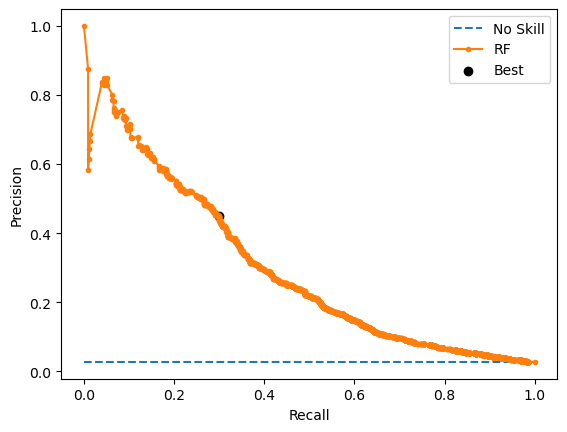

In [ ]:
# optimal threshold for precision-recall curve with logistic regression model
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, rf.predict(X_test))
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='RF')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

Text(0.5, 1.0, 'Feature importance - FA up to 1Y')

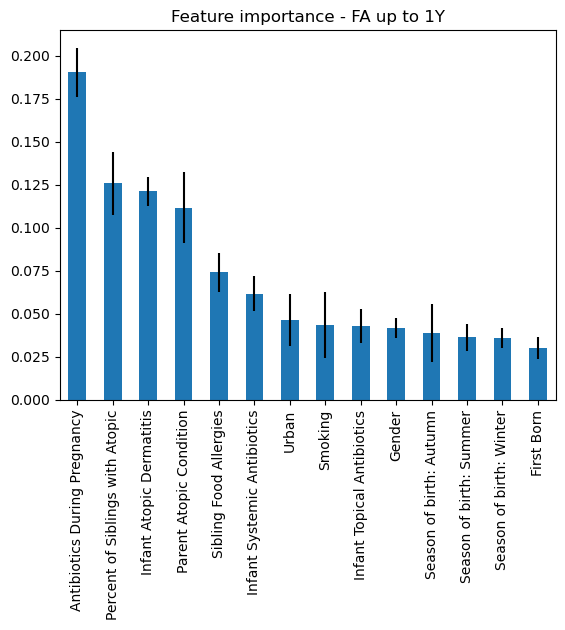

In [ ]:
model = rf
#model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

std = np.std([i.feature_importances_ for i in rf.estimators_], axis=0)

importances = rf.feature_importances_

feat_with_importance = pd.Series(importances, X.columns).nlargest(20)
fig, ax = plt.subplots()
feat_with_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance - FA up to 1Y")

# MD diagnosed

In [ ]:
# MD diagnosed !
df = pd.read_csv('Z:\\Tami - summaries\\pred_FA_MD_1Y.csv')

In [ ]:
Season_dum = pd.get_dummies(df['birth_season'])
df = pd.concat([df, Season_dum], axis=1, join='inner')

In [ ]:
df

,Unnamed: 0,CustomerKey_Encrypt,FA_cohort,birth_year,Gender,urban,SES_group,infant_AD,AD_6m,birth_season,...,FA.Sib_b,Percent.atopic.sblng,First.Born,atopic_parent,FA_parent,atopic_parent_g,Autumn,Summer,Winter,spring
0,1,00005A8A244422699216118399B17402D02007A32DA58D...,0,2007,1,0,1,0,0,Winter,...,0,0.0,0,0,0,0,0,0,1,0
1,2,0000B0D61D3865CFAC21B96BB15844ADC9456D6D1011AD...,0,2009,0,1,3,0,0,spring,...,0,1.0,0,0,0,0,0,0,0,1
2,3,00010B6AF2139604393D1CEC3E17CE5430DB5096297859...,1,2017,1,1,3,1,1,spring,...,0,0.0,1,1,1,1,0,0,0,1
3,4,00017BB43FB7F65D7E2D48B9DCABB27B955141C58F42C0...,1,2007,1,0,2,0,0,Summer,...,1,1.0,0,1,0,1,0,1,0,0
4,5,0002374661CF903F57D5C74A226618278C387B88D89B82...,1,2009,1,0,4,0,0,spring,...,0,0.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123417,123418,FFFADD974A73F65999462F8079C27CA06138E02EA2A3E0...,0,2018,1,0,1,0,0,Autumn,...,0,0.0,0,1,0,1,1,0,0,0
123418,123419,FFFE5A810A419B39E48F37828A5C66E62908AE5D2464E2...,1,2006,1,1,1,0,0,Winter,...,0,0.0,0,0,0,0,0,0,1,0
123419,123420,FFFF0C732FDA3E82B7F8CA0F212FE917D771636A3715FE...,0,2016,0,1,4,0,0,Summer,...,0,0.0,0,0,0,0,0,1,0,0
123420,123421,FFFF2DD29A67563A8F81C8AEF7FEBAA4B7ED3FBF9A3A5F...,0,2005,1,0,3,0,0,Autumn,...,0,0.0,1,0,0,0,1,0,0,0


In [ ]:
print (df.FA_cohort.value_counts(normalize=False))
print (df.FA_cohort.value_counts(normalize=True))

0    106977
1     16445
Name: FA_cohort, dtype: int64
0    0.866758
1    0.133242
Name: FA_cohort, dtype: float64


In [ ]:
df = df.rename(columns={"FA_cohort":"cohort",
                          "Summer":"Season of birth: Summer",
                          "Winter":"Season of birth: Winter",
                          "Autumn":"Season of birth: Autumn",
                        "family.smoke":"Smoking in family",
                          "FA.Sib_b":"Sibling Food Allergies",
                          "atopic_parent_g":"Parent Atopic Condition",
                          "AD_6m":"Infant Atopic Dermatitis",
                          "Percent.atopic.sblng":"Percent of Siblings with Atopic",
                       "sys_antbtc_1Y":"Infant Systemic Antibiotics",
                       "top_antbtc_1Y":"Infant Topical Antibiotics",
                        "any_antbtcs_1Y":"Infant Antibiotics",
                       "First.Born":"First Born",
                        "urban":"Urban"
                       })

In [ ]:
df['Infant Atopic Dermatitis'].value_counts()

0    120003
1      3419
Name: Infant Atopic Dermatitis, dtype: int64

In [ ]:
### Full FA Model ###
y = df.cohort

X = df[['Gender',
 'Urban',
 'Smoking in family',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
 'Infant Antibiotics', # variable post birth
 #'Infant Systemic Antibiotics',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter' ]]

X = X.apply(pd.to_numeric)

In [ ]:
df = df[df['birth_year']>2005]
print(df.cohort.value_counts(normalize=True))
print(df.cohort.value_counts(normalize=False))

0    0.861873
1    0.138127
Name: cohort, dtype: float64
0    95511
1    15307
Name: cohort, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=1) # 70% training and 30% test


In [ ]:
#balancing

from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=1) # 70% training and 30% test

pos = df[(df['cohort']==1)]
pos = pos.sample(n=int(len(pos)*0.7), random_state=35 )
neg = df[(df['cohort']==0)]
neg = neg.sample(n=int(len(pos)*2), random_state=35 )

X_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
y_train = X_train['cohort']
X_train = X_train[X.columns]

print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(y_test.value_counts(normalize=False))
print(df.cohort.value_counts(normalize=True))
print(df.cohort.value_counts(normalize=False))

0    21428
1    10714
Name: cohort, dtype: int64
0    0.666667
1    0.333333
Name: cohort, dtype: float64
0    0.863472
1    0.136528
Name: cohort, dtype: float64
0    28707
1     4539
Name: cohort, dtype: int64
0    0.861873
1    0.138127
Name: cohort, dtype: float64
0    95511
1    15307
Name: cohort, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,auc, classification_report


#rf = RandomForestClassifier(n_estimators=60, max_features='sqrt', max_depth=25, random_state=35)
#rf = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=20, max_features='sqrt', max_depth=20, random_state=35)

rf.fit(X_train,y_train)
#y_pred = rf.predict(X_test)
TH = 0.4
y_pred = (rf.predict(X_test) > TH).astype('float')


#model result
rf_matrix = confusion_matrix(y_test, y_pred)
print(rf_matrix)
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, rf.predict(X_test)))

[[31566   541]
 [ 4720   200]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     32107
           1       0.27      0.04      0.07      4920

    accuracy                           0.86     37027
   macro avg       0.57      0.51      0.50     37027
weighted avg       0.79      0.86      0.81     37027

Accuracy: 0.8579144948280985
Precision: 0.2699055330634278
Recall: 0.04065040650406504
roc_auc_score: 0.6280104653874582


Text(0.5, 1.0, 'Feature importance - FA MD diagnosed up to 1Y')

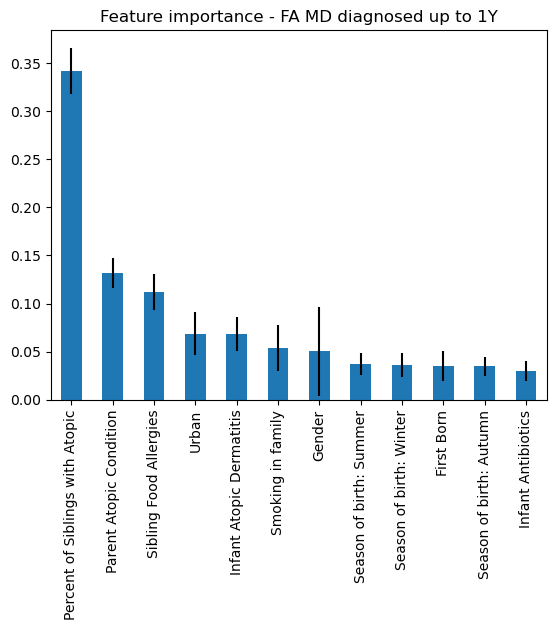

In [ ]:
model = rf
#model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

std = np.std([i.feature_importances_ for i in rf.estimators_], axis=0)

importances = rf.feature_importances_

feat_with_importance = pd.Series(importances, X.columns).nlargest(20)
fig, ax = plt.subplots()
feat_with_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance - FA MD diagnosed up to 1Y")

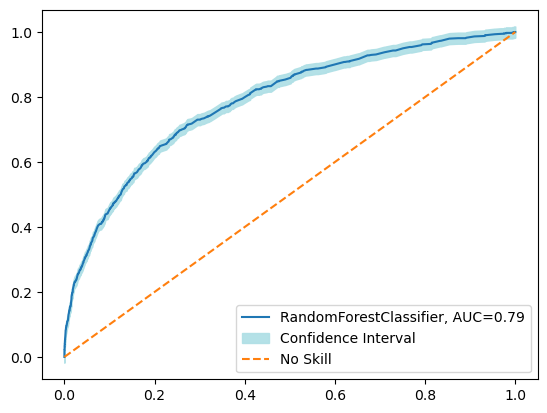

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  rf.predict(X_test))
auc = metrics.roc_auc_score(y_test, rf.predict(X_test))
#plt.plot(fpr,tpr,label="RandomForestClassifier, AUC="+str(auc))
#plt.legend(loc=4)
#plt.show()

# AUC with CI
x = fpr
y = tpr
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot (x,y)
ax.fill_between(x, (y-ci), (y+ci), color='powderblue', alpha=.95)
ax.plot([0,1], [0,1], linestyle='--')
ax.legend(["RandomForestClassifier, AUC="+str(round(auc,2)),"Confidence Interval","No Skill"])

In [ ]:
### Logistic Regression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
y_pred = logreg.predict_proba(X_test)[:,1] > 0.4

In [ ]:
#model result
rf_matrix = confusion_matrix(y_test, y_pred)
print(rf_matrix)
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, rf.predict(X_test)))

[[32006   101]
 [ 4866    54]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32107
           1       0.35      0.01      0.02      4920

    accuracy                           0.87     37027
   macro avg       0.61      0.50      0.47     37027
weighted avg       0.80      0.87      0.81     37027

Accuracy: 0.8658546466092311
Precision: 0.34838709677419355
Recall: 0.01097560975609756
roc_auc_score: 0.6280104653874582


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='sigmoid')
# sigmoid  polynomial  rbf  linear

clf.fit(X_train, y_train)

y_pred =clf.predict(X_test)


In [ ]:
#model result #: sigmoid
rf_matrix = confusion_matrix(y_test, y_pred)
print(rf_matrix)
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, rf.predict(X_test)))

[[22166  9904]
 [ 3091  1866]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77     32070
           1       0.16      0.38      0.22      4957

    accuracy                           0.65     37027
   macro avg       0.52      0.53      0.50     37027
weighted avg       0.78      0.65      0.70     37027

Accuracy: 0.6490398898101385
Precision: 0.15853865760407818
Recall: 0.37643736130724226
roc_auc_score: 0.6632561701980971


In [ ]:
df

,Unnamed: 0,CustomerKey_Encrypt,cohort,birth_year,Gender,Urban,SES_group,Infant Atopic Dermatitis,birth_season,Infant Systemic Antibiotics,...,Sibling Food Allergies,Percent of Siblings with Atopic,First Born,atopic_parent,FA_parent,Parent Atopic Condition,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter,spring
0,1,00005A8A244422699216118399B17402D02007A32DA58D...,0,2007,1,0,1,0,Winter,0,...,0,0.0,0,0,0,0,0,0,1,0
1,2,0000B0D61D3865CFAC21B96BB15844ADC9456D6D1011AD...,0,2009,0,1,3,0,spring,0,...,0,1.0,0,0,0,0,0,0,0,1
2,3,00010B6AF2139604393D1CEC3E17CE5430DB5096297859...,1,2017,1,1,3,1,spring,0,...,0,0.0,1,1,1,1,0,0,0,1
3,4,00017BB43FB7F65D7E2D48B9DCABB27B955141C58F42C0...,1,2007,1,0,2,0,Summer,0,...,1,1.0,0,1,0,1,0,1,0,0
4,5,0002374661CF903F57D5C74A226618278C387B88D89B82...,1,2009,1,0,4,0,spring,1,...,0,0.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123417,123418,FFFADD974A73F65999462F8079C27CA06138E02EA2A3E0...,0,2018,1,0,1,0,Autumn,0,...,0,0.0,0,1,0,1,1,0,0,0
123418,123419,FFFE5A810A419B39E48F37828A5C66E62908AE5D2464E2...,1,2006,1,1,1,0,Winter,0,...,0,0.0,0,0,0,0,0,0,1,0
123419,123420,FFFF0C732FDA3E82B7F8CA0F212FE917D771636A3715FE...,0,2016,0,1,4,0,Summer,1,...,0,0.0,0,0,0,0,0,1,0,0
123420,123421,FFFF2DD29A67563A8F81C8AEF7FEBAA4B7ED3FBF9A3A5F...,0,2005,1,0,3,0,Autumn,0,...,0,0.0,1,0,0,0,1,0,0,0


In [ ]:
import seaborn as sns

sns.pairplot(df[X], hue="cohort")